# Lecture 9: Automatic Speech Recognition II

## HMMs-based approach

The idea of ignorance modelling came up, after knowledge-based approaches were there. And its basic idea was to use the relevant reliable knowledge, and leave the rest to the data, all statistical distributions and so on come from the data.

The basic idea behind the usage of HMMs in speech recognition systems is: we want to estimate the posterior probability of a word sequence given the speech signal (Statistical Automatic Speech Recognition) $$\hat{W} = \underset{W_{k}\in\space\mathcal{W}}{\mathrm{arg\space max}}\space P(W_{k} | S) = \underset{W_{k}\in\space\mathcal{W}}{\mathrm{arg\space max}}\space \frac{p(W_{k}, S)}{p(S)}$$

Where here the posterior-based approach, estimating $P(W_{k} | S)$ is very difficult to compute, there are some good attempts using neural networks, but still, it cannot be computed perfectly, which is exactly why, using Bayes' rule, we got the basics and compute the likelihood-based approach, estimating $p(W_{k}, S)$.

So HMMs is based on the fact that we consider that, it is good enough to estimate the likelihood, using the assumption that the quantity $p(S)$ is independant of the word hypothesis.

We proceed per usual, we have a speech signal, we extract a sequence of feature vectors (eg. cepstral coefficients, etc...), and then we break down the joint likelihood $p(W_{k}, X | \Theta_{a}, \Theta_{l})$ into a conditional likelihood $p(X | W_{k}, \Theta_{a})$ 
$$p(W_{k}, X | \Theta_{a}, \Theta_{l}) = p(X | W_{k}, \Theta_{a})\cdot P(W_{k} | \Theta_{l})$$
- X being the feature vector
- $W_{k}$ being the word hypothesis
- $\Theta_{a}$ representing the acoustics
- $\Theta_{l}$ representing the language model

- $p(X | W_{k}, \Theta_{a})$ being the acoustic likelihood estimated using HMMs
- $P(W_{k}, \Theta_{l})$ being the language model probability estimated using DMMs


And here we have three subproblems that we need to solve to estimate this value: 
1. How to estimate $p(W_{k}, X)$ or simply $p(X | W_{k}, \Theta_{a})$ and $P(W_{k} | \Theta_{l})$?
2. How to estimate $\Theta_{a}$ and $\Theta_{l}$? (Training)?
3. How to find the most likely word hypothesis $\hat{\mathcal{W}}$? (Recognition or decoding)
$$\hat{W} = \underset{W_{k} \in\space\mathcal{W}}{\mathrm{arg\space max}}\space p(W_{k}, X | \Theta_{a}, \Theta_{l})$$

### Estimating $P(X | W_{k}, \Theta_{a})$

Say I have a feature vector X, and I want to compute what is the likelihood of X, representing the word hypothesis $W_{k}$ knowing $W_{k}$ and $\Theta_{a}$. With HMMs, I would have states, let's say for simplicity, I have only two states and my word has only two phones (is) /ih/ /s/.
Q here represents sequences of HMM states $Q =$ {$q_{1}, ..., q_{m}, ..., q_{M}$}.

We would find that $P(X | W_{k}, \Theta_{a}) = \sum_{Q}P(X, Q | W_{k})$, which, assuming a first-order Markov Model, would give us $\sum_{Q}P(X | Q, W_{k})\cdot P(Q)$ and $P(Q)$ can be given as $\prod_{m=1}^{M}P(q_{m} | q_{m-1})$, and for $P(X | Q, W_{k})$, using the assumption of it being conditional iid, meaning that given a $q_{m}$, $x_{m}$ is independant of all other vectors (ie. $q_{i}\space \forall i\neq m$ AND $x_{i}\space \forall i\neq m$) will be approximated by $\prod_{m=1}^{M} P(x_{m} | q_{m})$.

Now instead of summing over all Q, we can choose the max, to check the most probable path, and this is called the Viterbi approximation of the likelihood. Using Viterbi approximation gives us the possibility of knowing we were at which state at which time step, which is not possible if we sum over $\forall Q$.

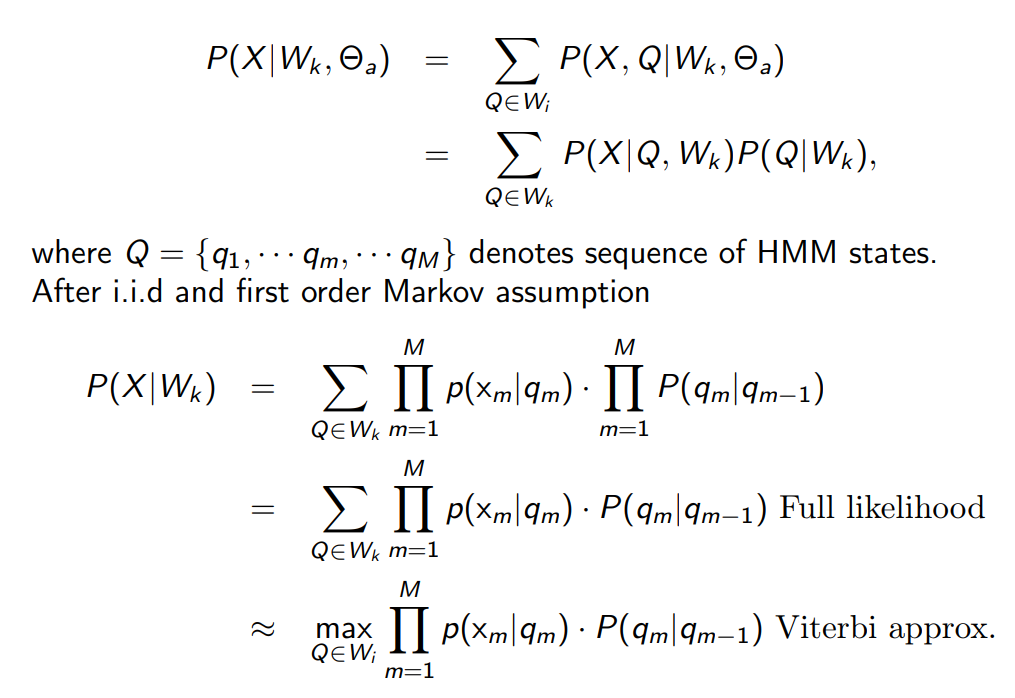

Now, $p(x_{m} | q_{m})$ can be estimated as being $\sum_{d=1}^{D}p(x_{m}, a^{d} | q_{m})$, where we are now in the latent space, and $a^{d}$ are the latent symbols, and this itself can be simplified as $\sum_{d=1}^{D}p(x_{m} | a^{d}, q_{m})\cdot P(a^{d} | q_{m})$. Now if I know the latent symbol $a^{d}$, I can easily assume that $x_{m}$ is independant of $q_{m}$, so we can remove it and have $\sum_{d=1}^{D}p(x_{m} | a^{d})$, which this can be represented and estimated using Gaussians, KNNs, and $P(a^{d} | q_{m})$ is a very deterministic relation. (product between a likelihood vector and a probability vector now).

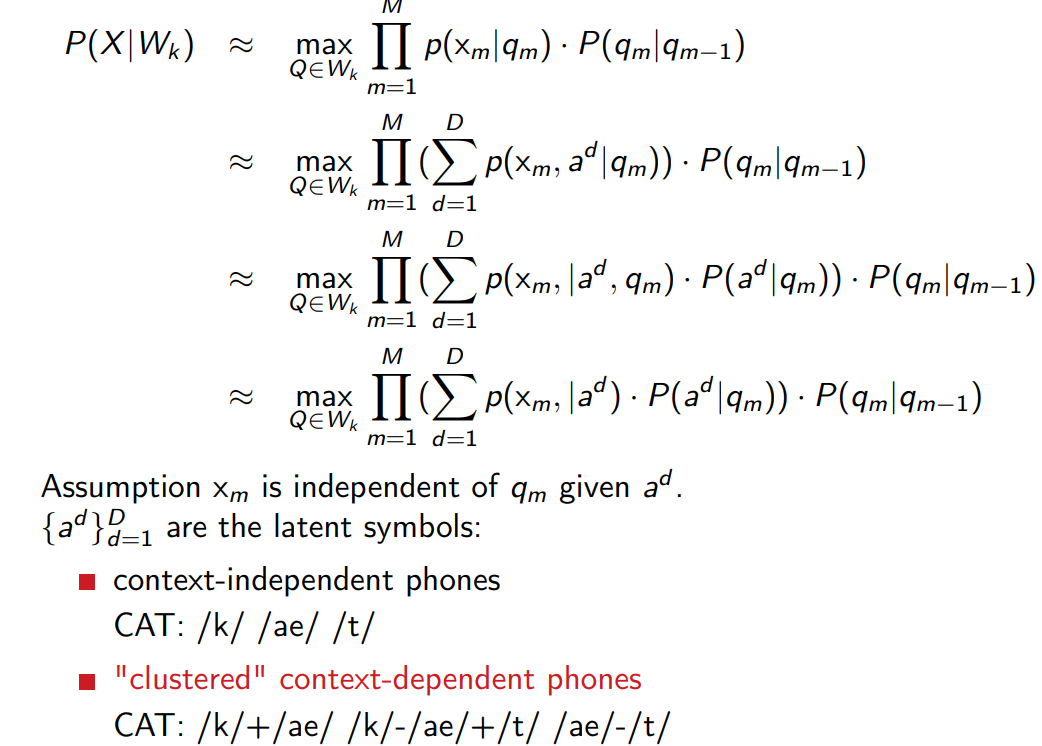

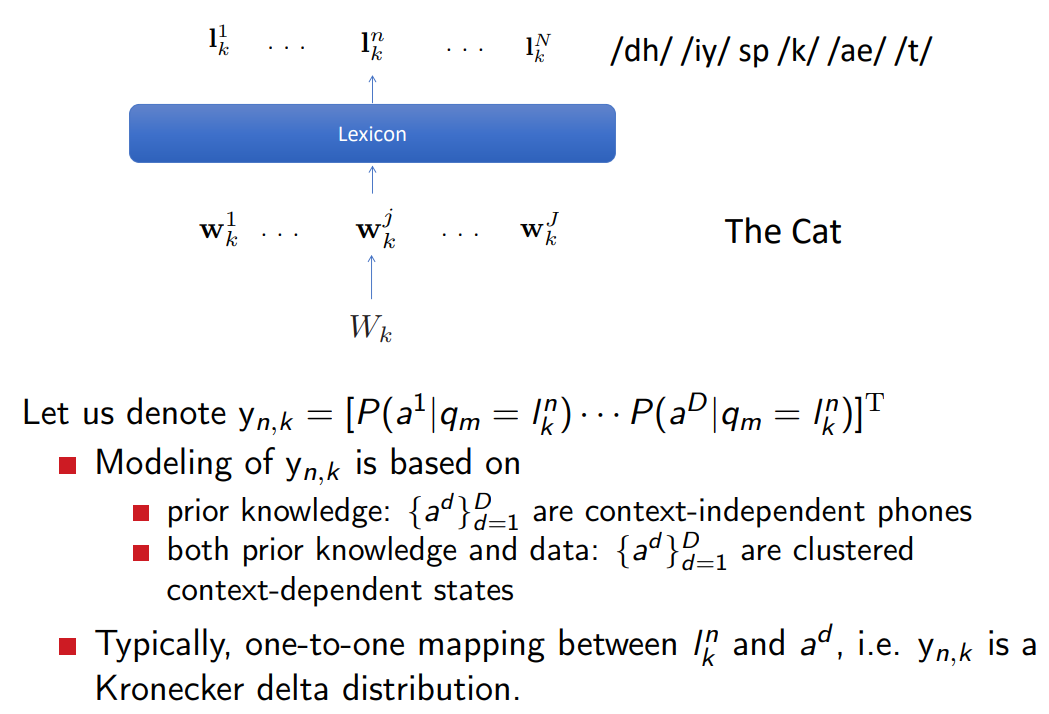

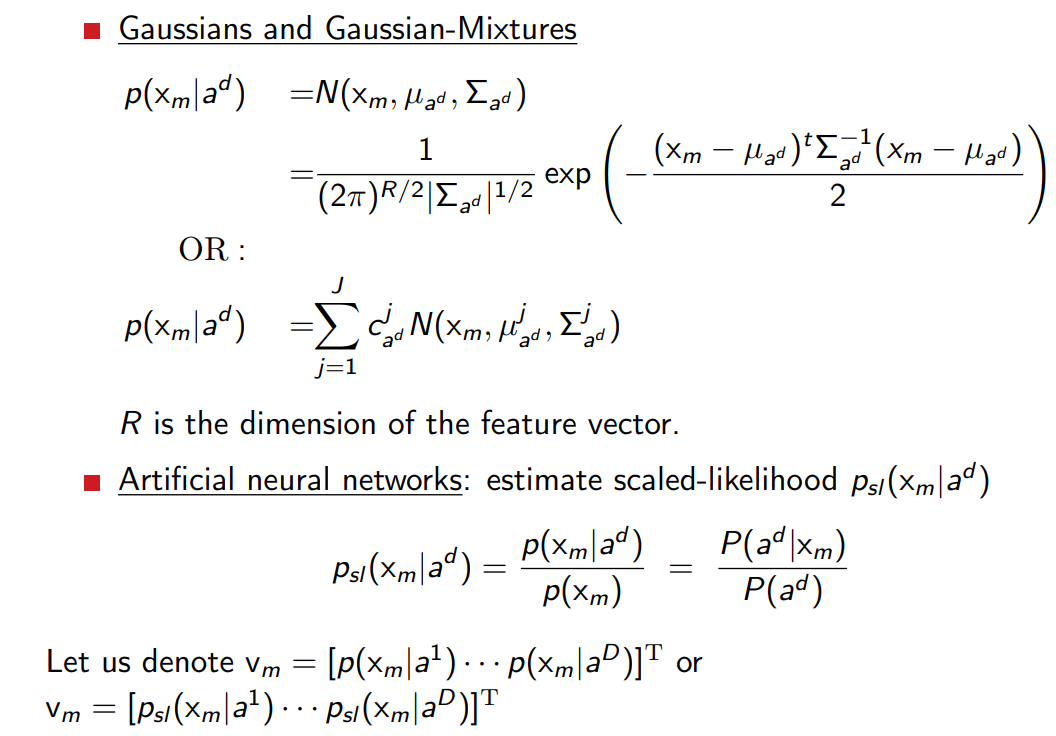

ANNs give us the posterior probability, but we want the likelihood, so we divide by the priors, giving us the scaled likelihood.

The latent space symbols set $a^{d}$, is simple if we want context independant phones (number of phones + 1 for silence), if context dependant, we raise to the power of 3, which we cannot have data representative of it, and some sequences will not even be relevant, some less frequent, etc...

And we can perform dynamic programming normally, local constraints are given by the topology, how can I end up in this phone, it's either the previous phone or the same one, or it HAS to be the first phone, etc...

The only different in this dynamic programming part is that each transition has a cost, the local score became a stochastic value, it became a log-likelihood.

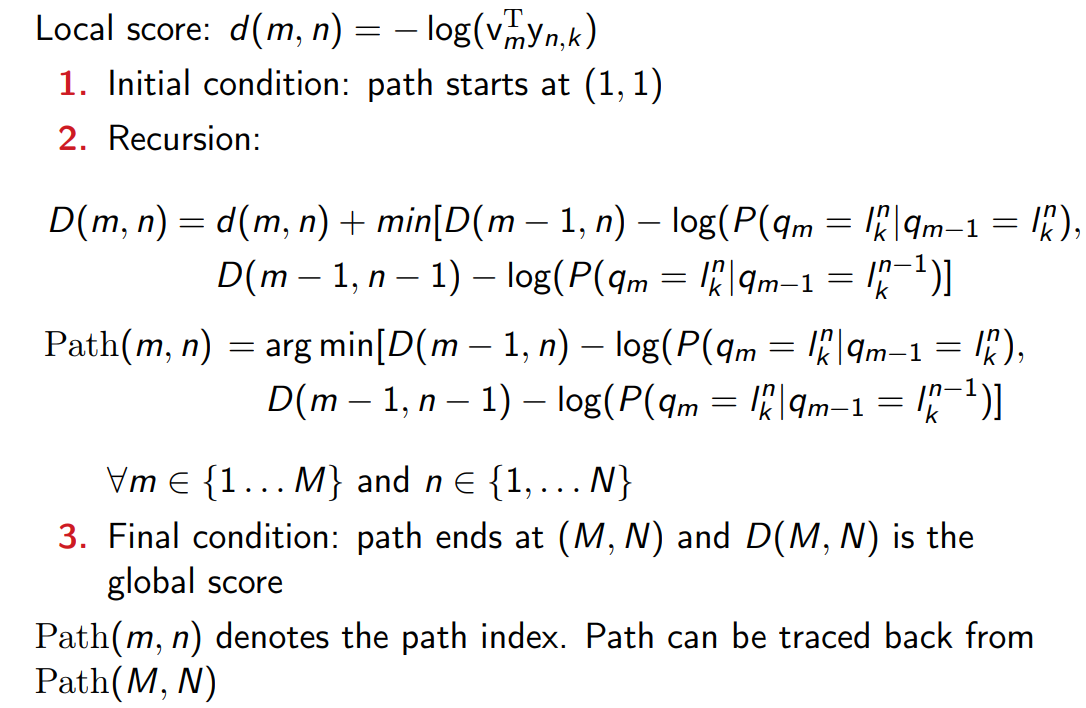


### Dynamic Programming Local Constraints

We have local constraints for within word transitions, and across word constraints.

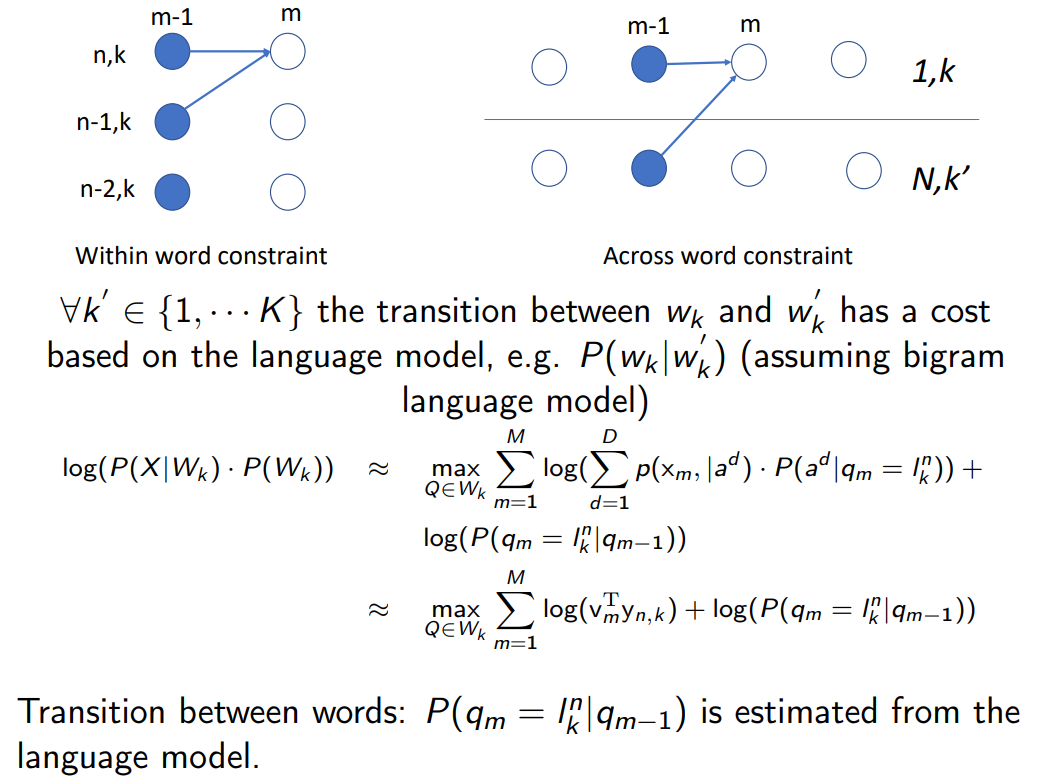

We can also still use the One-Stage Dynamic Programming. 

### Subquestions Answers: 

1. Latent symbol set {$a^{d}$}$_{d=1}^{D}$: typically clustered context-dependant phones.
2. Estimation of emission likelihood vector $v_{m}$ per frame using GMMs or ANNs.
3. Estimation of $y_{n, k}, typically one-to-one mapping between context-dependant phone unit $I_{k}^{n}$ and $a^{d}$ (ie. Kronecker delta distribution) based on the state tying decision tree
4. Dynamic programming with local score $- log(v_{m}^{\mathcal{T}}y_{n, k}) and local constraints are based on the HMM topology and transitions can have unequal costs.

Context-dependant clustering, where we here are modelling for the /ih/ phone, for similar sound contexts, we merge the parameters of the states (Gaussians), resulting in 6 Gaussians instead of 12 Gaussians, so instead of needing to model 64 000, we may only need to model 2000, that are still representing context-dependant phones.

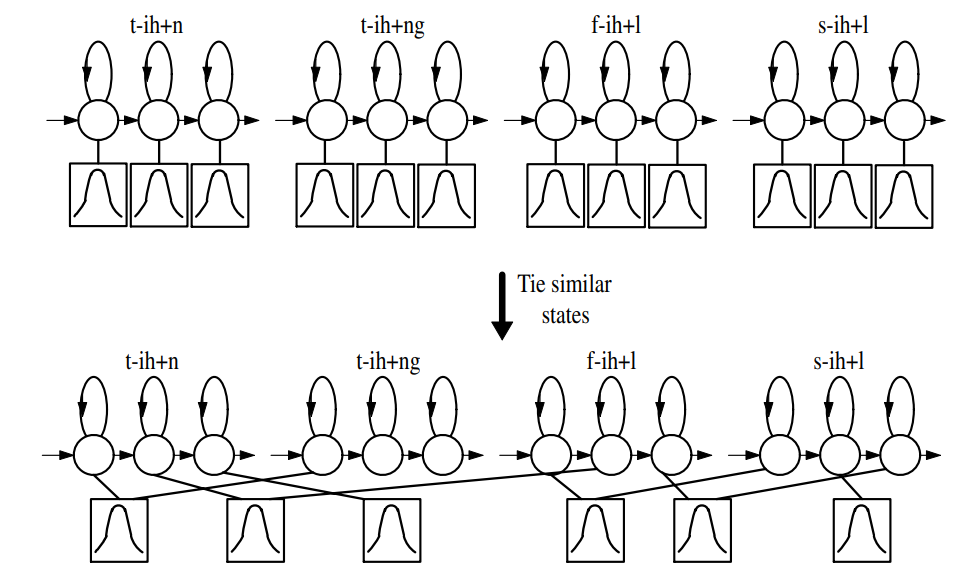

### Training

We use the Viterbi Algorithm in the E-M algorithm. Viterbi algorithm is the expectation step, we then get the new segmentation and update the means and all parameters, being the maximization step.

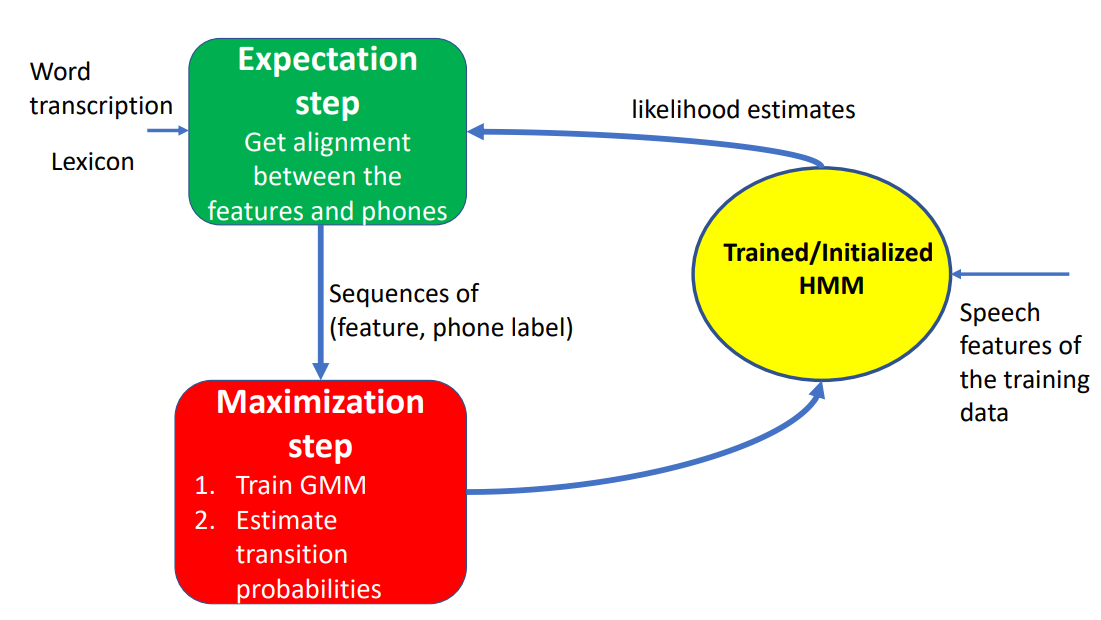

In the case of ANNs, after the expectation step, we train an ANN classifier, and estimate prior and transition probabilities, and then come back to the expectation step. 

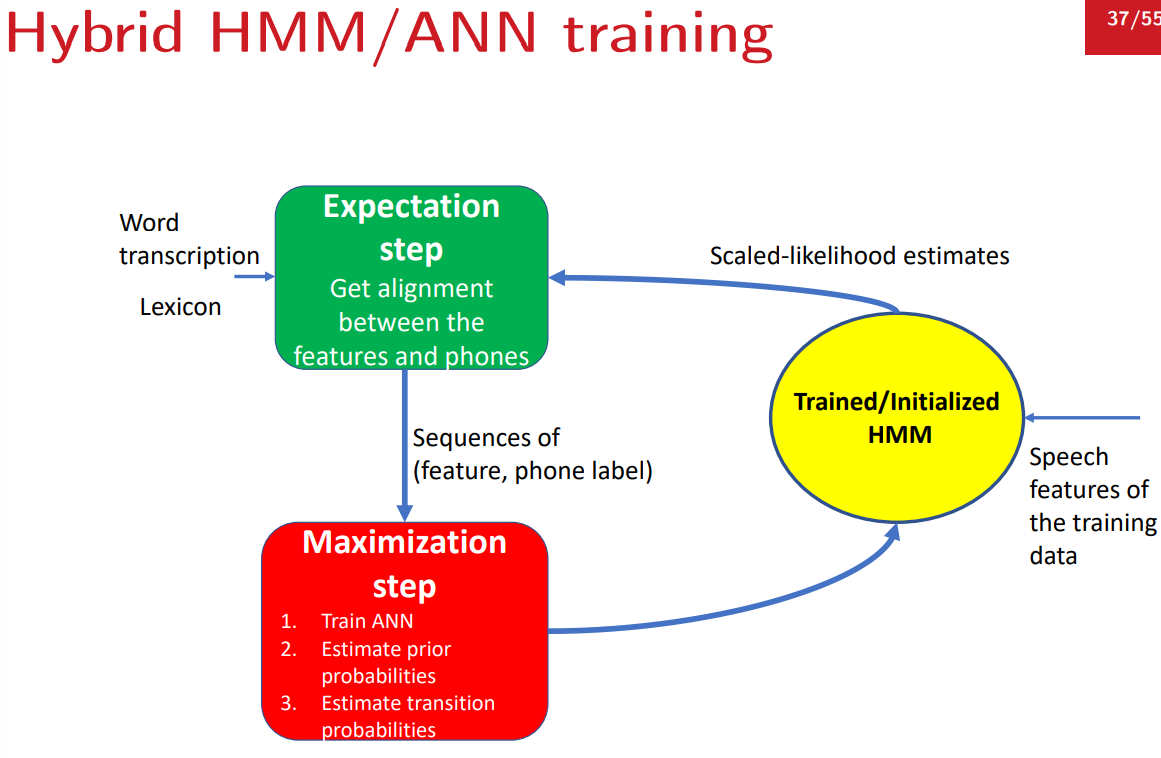

The data and resources needed: 

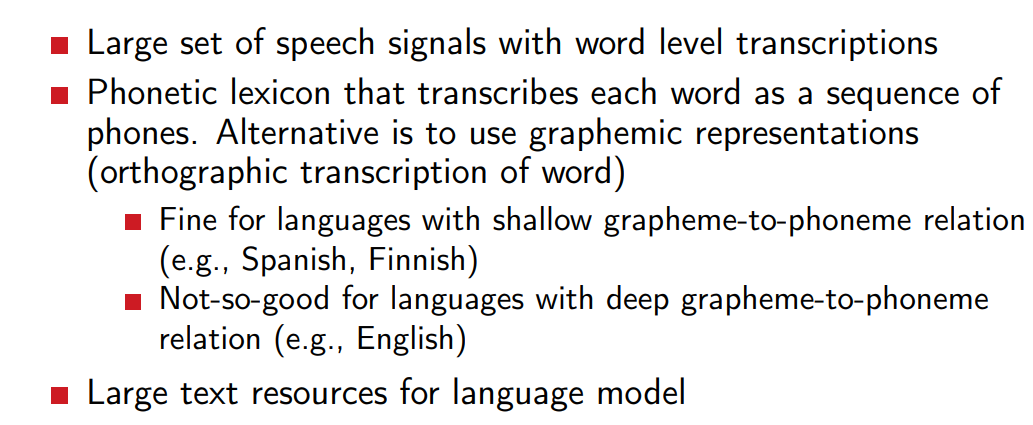

## HMM-based ASR system as a whole

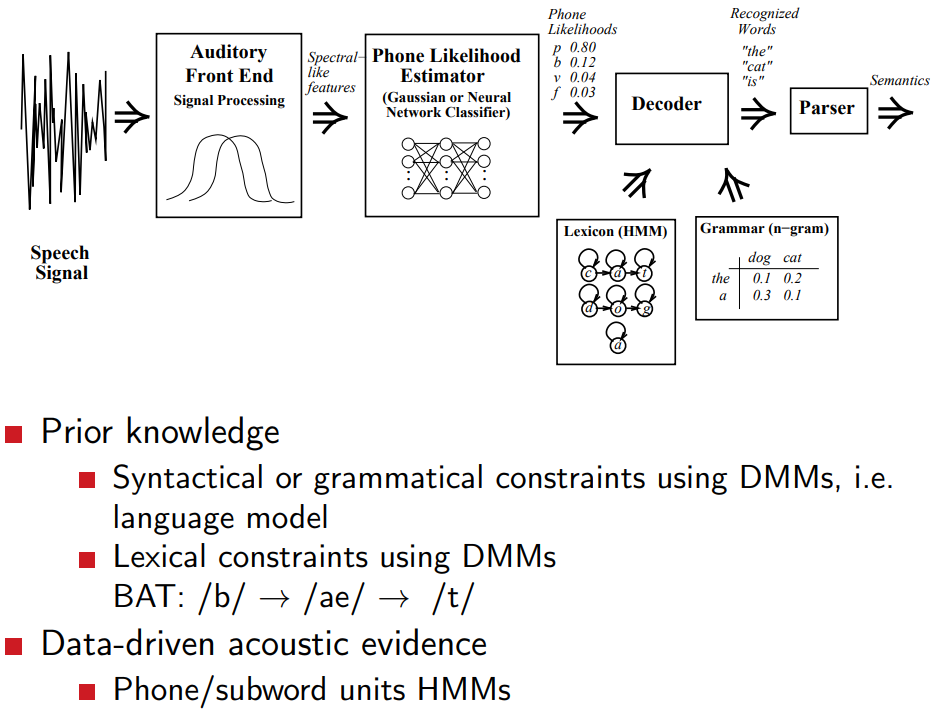

Decoder: 

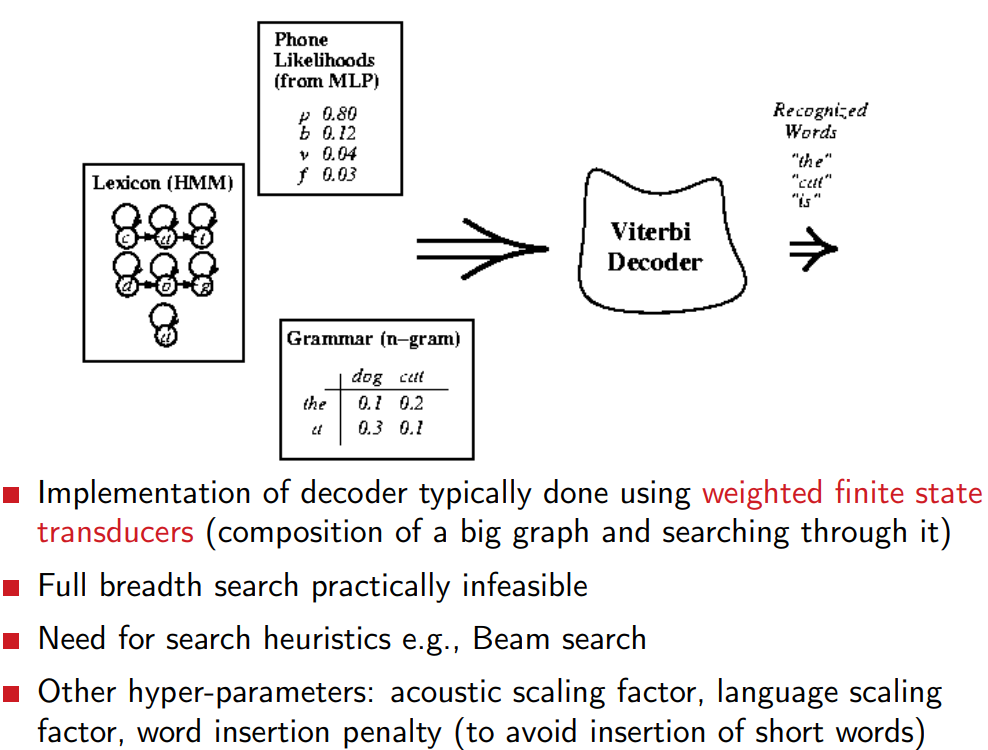

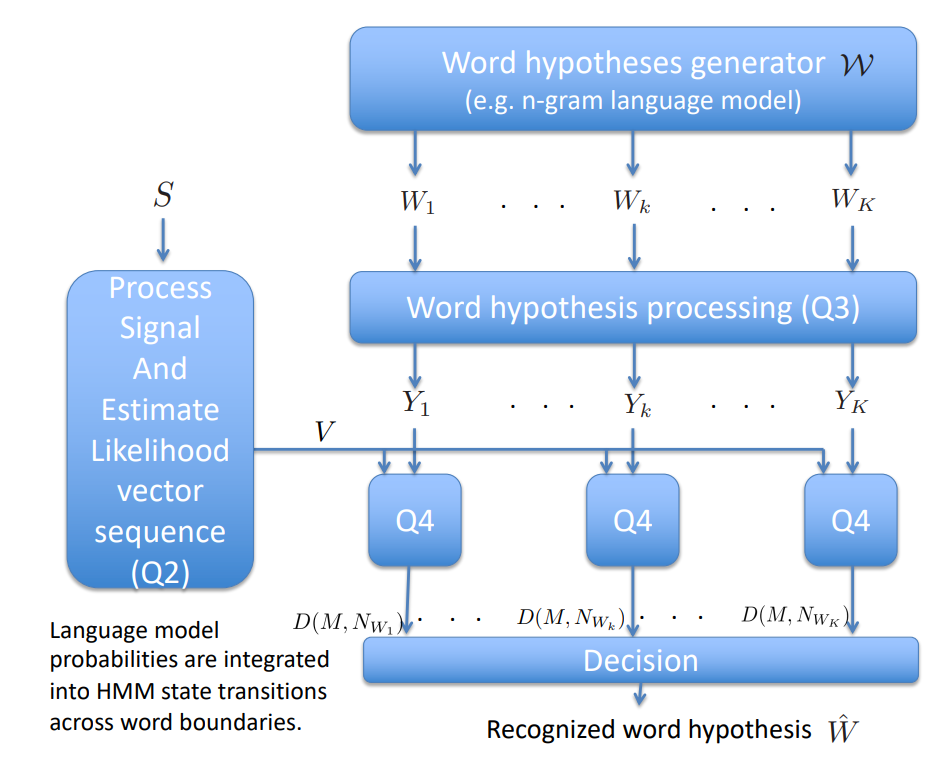